<a href="https://colab.research.google.com/github/vsoos/DeepLearning/blob/main/ex1/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise project 1 – ANN for regression (Batch predictions)

In [ ]:
!pip install -q keras-tqdm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
folder_path = "/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1"
os.chdir(folder_path)

In [ ]:
df = pd.read_csv("data/Folds5x2_pp.csv")
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum',
                   'AP': 'Ambient Pressure', 'RH': 'Relative Humidity',
                   'PE': 'Net Hourly Electrical Energy Output'}, inplace=True)

In [ ]:
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
X = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Error Metrics
mae = mean_absolute_error(y_test, lr_predictions)
mse = mean_squared_error(y_test, lr_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

Linear Regression Metrics:
MAE: 3.54, MSE: 19.61, RMSE: 4.43, R-squared: 0.93


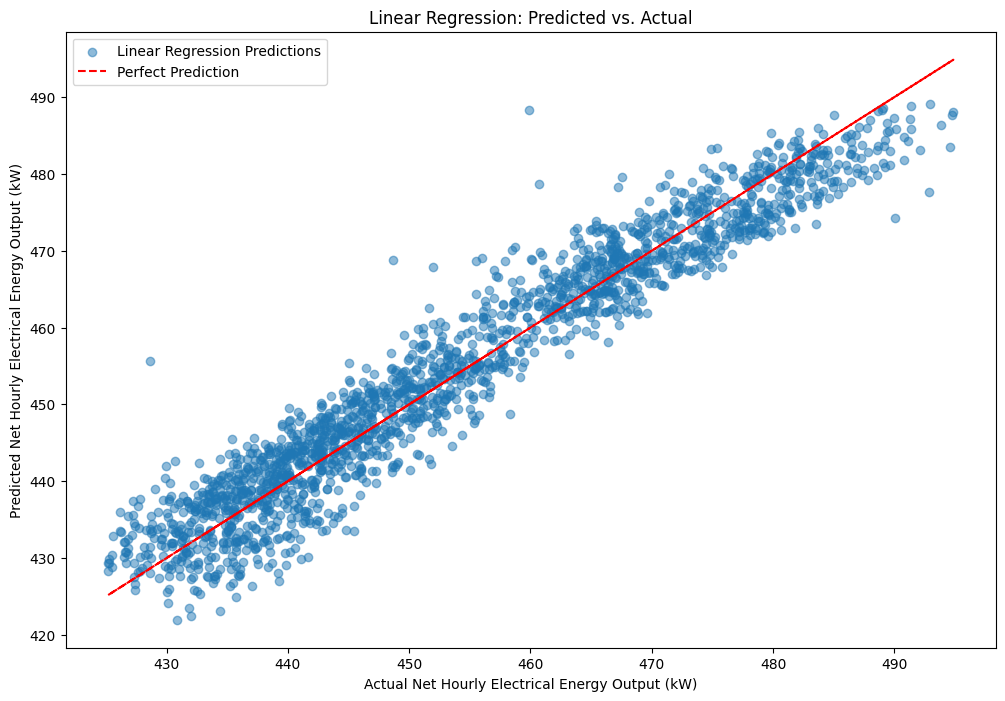

In [ ]:
# Visualization of Predictions vs Actual
plt.figure(figsize=(12, 8))
plt.scatter(y_test, lr_predictions, alpha=0.5, label="Linear Regression Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Net Hourly Electrical Energy Output (kW)")
plt.ylabel("Predicted Net Hourly Electrical Energy Output (kW)")
plt.title("Linear Regression: Predicted vs. Actual")
plt.legend()
plt.show()

In [ ]:
imaginary_data = np.array([
    [15, 70, 1015, 60],
    [25, 60, 1010, 50],
    [35, 50, 1005, 40]
])
scaled_imaginary_data = scaler.transform(imaginary_data)
imaginary_predictions = lr_model.predict(scaled_imaginary_data)

print("Imaginary Data Predictions (Linear Regression):")
for i, pred in enumerate(imaginary_predictions):
    print(f"Input {i+1}: {imaginary_data[i]} => Predicted Output: {pred:.2f} kW")

Imaginary Data Predictions (Linear Regression):
Input 1: [  15   70 1015   60] => Predicted Output: 462.15 kW
Input 2: [  25   60 1010   50] => Predicted Output: 446.01 kW
Input 3: [  35   50 1005   40] => Predicted Output: 429.88 kW


In [ ]:
# Correlation Analysis
corr = df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)
print(corr)


Net Hourly Electrical Energy Output    1.000000
Ambient Pressure                       0.518429
Relative Humidity                      0.389794
Exhaust Vacuum                        -0.869780
Average Temperature                   -0.948128
Name: Net Hourly Electrical Energy Output, dtype: float64


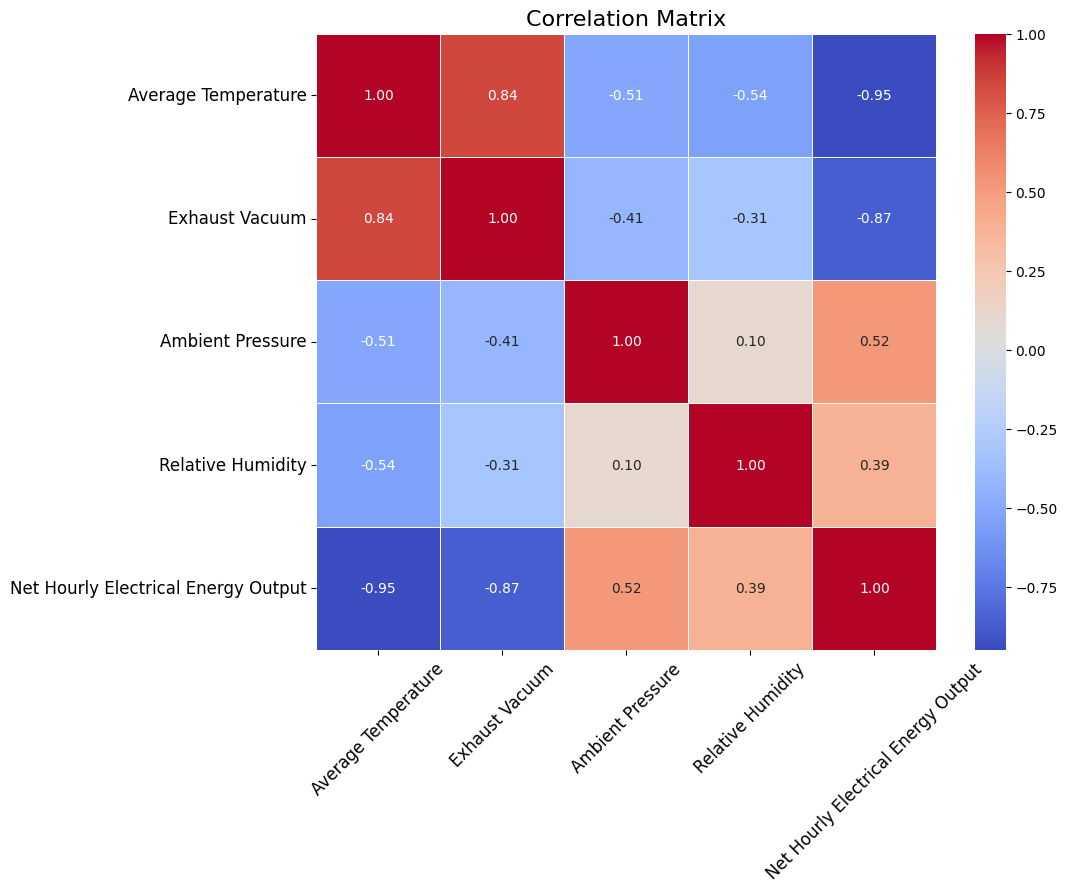

In [ ]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print("Median of the Target:")
print(df['Net Hourly Electrical Energy Output'].median())

Median of the Target:
451.54999999999995


In [ ]:
# Establish Baseline
baseline_values = np.array([[
    df['Average Temperature'].median(),
    df['Exhaust Vacuum'].median(),
    df['Ambient Pressure'].median(),
    df['Relative Humidity'].median()
]])
print("Baseline Values")
for feature, value in zip(df.columns[:-1], baseline_values[0]):  # Exclude the target column
    print(f"{feature}: {value:.2f}")

Baseline Values
Average Temperature: 20.34
Exhaust Vacuum: 52.08
Ambient Pressure: 1012.94
Relative Humidity: 74.97


In [ ]:
# Adjusted Test Data for Impact Analysis
imaginary_data = np.array([
    [baseline_values[0][0] * 1.50, baseline_values[0][1], baseline_values[0][2], baseline_values[0][3]],  # Temp
    [baseline_values[0][0], baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Vacuum
    [baseline_values[0][0] * 1.50, baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Both NEGcorr
    [baseline_values[0][0], baseline_values[0][1], baseline_values[0][2] * 1.50, baseline_values[0][3]], # Ambient Pressure
])

print("\nAdjusted Imaginary Test Data:")
for i, row in enumerate(imaginary_data):
    print(f"Scenario {i+1}: {row}")


Adjusted Imaginary Test Data:
Scenario 1: [  30.5175   52.08   1012.94     74.975 ]
Scenario 2: [  20.345   78.12  1012.94    74.975]
Scenario 3: [  30.5175   78.12   1012.94     74.975 ]
Scenario 4: [  20.345   52.08  1519.41    74.975]


In [ ]:
scaled_imaginary_data = scaler.transform(imaginary_data)
impact_predictions = lr_model.predict(scaled_imaginary_data)

print("\nPredictions for Adjusted Imaginary Data (Linear Regression):")
for i, pred in enumerate(impact_predictions):
    print(f"Scenario {i+1}: Predicted Energy Output = {pred:.2f} kW")


Predictions for Adjusted Imaginary Data (Linear Regression):
Scenario 1: Predicted Energy Output = 433.19 kW
Scenario 2: Predicted Energy Output = 447.18 kW
Scenario 3: Predicted Energy Output = 427.07 kW
Scenario 4: Predicted Energy Output = 482.80 kW
